### Plot Diff-in-Diff for Florida, Texas, and Washington

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fl_mortality = pd.read_csv("../00_source_data/fl_mortality.csv", sep=",", index_col=0)
tx_mortality = pd.read_csv("../00_source_data/tx_mortality.csv", sep=",", index_col=0)
wa_mortality = pd.read_csv("../00_source_data/wa_mortality.csv", sep=",", index_col=0)
mortality_compare_to_fl = pd.read_csv(
    "../00_Source_data/Comparison/mortality_comparisons_for_fl.csv", sep=",", index_col=0
)
mortality_compare_to_tx = pd.read_csv(
    "../00_Source_data/Comparison/mortality_comparisons_for_tx.csv", sep=",", index_col=0
)
mortality_compare_to_wa = pd.read_csv(
    "../00_Source_data/Comparison/mortality_comparisons_for_wa.csv", sep=",", index_col=0
)

In [3]:
fl_mortality

,Year,County,Deaths,Population,State,Mortality Rate
0,2003,Alachua County,11.0,227022.0,FL,0.000048
1,2003,Baker County,8.0,23555.0,FL,0.000340
2,2003,Bay County,21.0,155044.0,FL,0.000135
3,2003,Bradford County,4.0,27035.0,FL,0.000148
4,2003,Brevard County,97.0,504847.0,FL,0.000192
...,...,...,...,...,...,...
866,2015,Union County,4.0,15265.0,FL,0.000262
867,2015,Volusia County,98.0,516730.0,FL,0.000190
868,2015,Wakulla County,1.0,31523.0,FL,0.000032
869,2015,Walton County,5.0,63066.0,FL,0.000079


In [4]:
mortality_compare_to_fl

,Year,County,Deaths,Population,State,Mortality Rate
0,2003,Adams County,8.0,67267.0,IL,0.000119
1,2003,Alexander County,0.0,9254.0,IL,0.000000
2,2003,Bond County,1.0,17960.0,IL,0.000056
3,2003,Boone County,4.0,46242.0,IL,0.000087
4,2003,Brown County,1.0,6997.0,IL,0.000143
...,...,...,...,...,...,...
4454,2015,Whitfield County,12.0,103669.0,GA,0.000116
4455,2015,Wilcox County,1.0,9024.0,GA,0.000111
4456,2015,Wilkes County,8.0,9911.0,GA,0.000807
4457,2015,Wilkinson County,8.0,9080.0,GA,0.000881


In [5]:
mortality_compare_to_fl["County"].nunique()

276

#### Florida

In [6]:
# seperate to pre and post policy periods for FL and comparison states (average of PA, AR, NM)

x_pre_fl = np.array(fl_mortality[fl_mortality["Year"] < 2010]["Year"])
y_pre_fl = np.array(fl_mortality[fl_mortality["Year"] < 2010]["Mortality Rate"])
x_post_fl = np.array(fl_mortality[fl_mortality["Year"] >= 2010]["Year"])
y_post_fl = np.array(fl_mortality[fl_mortality["Year"] >= 2010]["Mortality Rate"])

x_pre_comp_fl = np.array(
    mortality_compare_to_fl[mortality_compare_to_fl["Year"] < 2010]["Year"]
)
y_pre_comp_fl = np.array(
    mortality_compare_to_fl[mortality_compare_to_fl["Year"] < 2010]["Mortality Rate"]
)
x_post_comp_fl = np.array(
    mortality_compare_to_fl[mortality_compare_to_fl["Year"] >= 2010]["Year"]
)
y_post_comp_fl = np.array(
    mortality_compare_to_fl[mortality_compare_to_fl["Year"] >= 2010]["Mortality Rate"]
)

In [7]:
def plot_diff_in_diff(State_ABBR, x_pre, y_pre, x_post, y_post, x_pre_comp, y_pre_comp, x_post_comp, y_post_comp, policy_year):
    import warnings

    warnings.filterwarnings("ignore")

    fig, ax = plt.subplots()
    m, b = np.polyfit(x_pre, y_pre, 1)
    plt.plot(x_pre, m * x_pre + b, color="red")
    ax = sns.regplot(x_pre, y_pre, ci=95, color="r", scatter=False)

    m, b = np.polyfit(x_post, y_post, 1)
    plt.plot(x_post, m * x_post + b, color="red", label="Texas")
    ax = sns.regplot(x_post, y_post, ci=95, color="r", scatter=False)

    m, b = np.polyfit(x_pre_comp, y_pre_comp, 1)
    plt.plot(x_pre_comp, m * x_pre_comp + b, color="blue")
    ax = sns.regplot(x_pre_comp, y_pre_comp, ci=95, color="b", scatter=False)

    m, b = np.polyfit(x_post_comp, y_post_comp, 1)
    plt.plot(x_post_comp, m * x_post_comp + b, color="blue", label="Comparison")
    ax = sns.regplot(x_post_comp, y_post_comp, ci=95, color="b", scatter=False)

    plt.xlabel("Year")
    plt.ylabel("Avg. Mortality Rate")
    plt.title(State_ABBR + " Diff-in-Diff Model Graph")
    plt.axvline(x=policy_year, color="black", ls=":")
    plt.text(policy_year + 0.2, y_post.mean() * 0.85, "Policy Change", fontsize=12)
    plt.text(2003.3, y_pre.mean() * 1.1, "CI:95%", fontsize=10)
    plt.grid(b=True, which="major", color="#999999", linestyle="-", alpha=0.2)

    plt.legend(loc="upper left")
    plt.show()

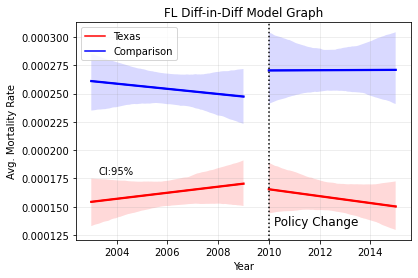

In [8]:
plot_diff_in_diff("FL", x_pre_fl, y_pre_fl, x_post_fl, y_post_fl, x_pre_comp_fl, y_pre_comp_fl, x_post_comp_fl, y_post_comp_fl, 2010)

### Texas

In [9]:
# seperate to pre and post policy periods for TX and comparison states (average of CO, ID, MI)

x_pre_tx = np.array(tx_mortality[tx_mortality["Year"] < 2007]["Year"])
y_pre_tx = np.array(tx_mortality[tx_mortality["Year"] < 2007]["Mortality Rate"])
x_post_tx = np.array(tx_mortality[tx_mortality["Year"] >= 2007]["Year"])
y_post_tx = np.array(tx_mortality[tx_mortality["Year"] >= 2007]["Mortality Rate"])

x_pre_comp_tx = np.array(
    mortality_compare_to_tx[mortality_compare_to_tx["Year"] < 2007]["Year"]
)
y_pre_comp_tx = np.array(
    mortality_compare_to_tx[mortality_compare_to_tx["Year"] < 2007]["Mortality Rate"]
)
x_post_comp_tx = np.array(
    mortality_compare_to_tx[mortality_compare_to_tx["Year"] >= 2007]["Year"]
)
y_post_comp_tx = np.array(
    mortality_compare_to_tx[mortality_compare_to_tx["Year"] >= 2007]["Mortality Rate"]
)

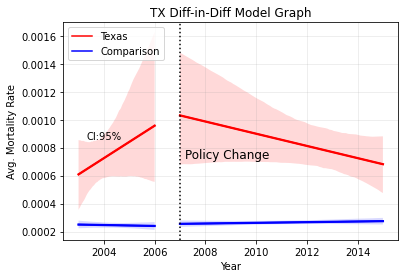

In [10]:
plot_diff_in_diff("TX", x_pre_tx, y_pre_tx, x_post_tx, y_post_tx, x_pre_comp_tx, y_pre_comp_tx, x_post_comp_tx, y_post_comp_tx, 2007)

#### Washington

In [11]:
# seperate to pre and post policy periods for WA and comparison states (average of OR, CA, NV)

x_pre_wa = np.array(wa_mortality[wa_mortality["Year"] < 2012]["Year"])
y_pre_wa = np.array(wa_mortality[wa_mortality["Year"] < 2012]["Mortality Rate"])
x_post_wa = np.array(wa_mortality[wa_mortality["Year"] >= 2012]["Year"])
y_post_wa = np.array(wa_mortality[wa_mortality["Year"] >= 2012]["Mortality Rate"])

x_pre_comp_wa = np.array(
    mortality_compare_to_wa[mortality_compare_to_wa["Year"] < 2012]["Year"]
)
y_pre_comp_wa = np.array(
    mortality_compare_to_wa[mortality_compare_to_wa["Year"] < 2012]["Mortality Rate"]
)
x_post_comp_wa = np.array(
    mortality_compare_to_wa[mortality_compare_to_wa["Year"] >= 2012]["Year"]
)
y_post_comp_wa = np.array(
    mortality_compare_to_wa[mortality_compare_to_wa["Year"] >= 2012]["Mortality Rate"]
)

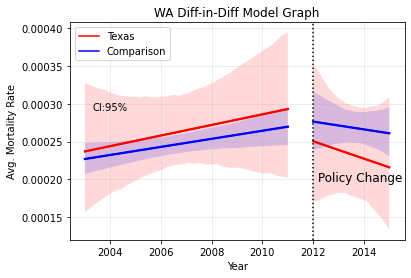

In [12]:
plot_diff_in_diff("WA", x_pre_wa, y_pre_wa, x_post_wa, y_post_wa, x_pre_comp_wa, y_pre_comp_wa, x_post_comp_wa, y_post_comp_wa, 2012)